In [6]:
source_file = "../../interactive_pcd_lib/analyse_pcd_similarity/source_cloud1.ply"
raycasted_source_file = "../../interactive_pcd_lib/analyse_pcd_similarity/raycasted_source_cloud1_2.ply"


In [7]:
import os
import pandas as pd
import open3d as o3d
from surface_variation import PointCloudAnalysis



neigh_num = 5
kdtreeseachknn = o3d.geometry.KDTreeSearchParamKNN(neigh_num)

In [8]:
source_pcd = o3d.io.read_point_cloud(source_file)

src_pcd_obj = PointCloudAnalysis(source_pcd.points, search_tree=kdtreeseachknn)

In [9]:
src_norm_surf_var = src_pcd_obj.get_normalized_surface_variation()

In [10]:
import numpy as np
def get_bin_size_for_histogram(_data):
    """
    Bin calculated using Freedman-Diaconis rule for the histogram plot
    """
    iqr = np.percentile(_data, 75) - np.percentile(_data, 25)
    bin_width = 2 * iqr / np.power(len(_data), 1/3)
    num_bins = int((np.max(_data) - np.min(_data)) / bin_width)
    return num_bins

In [13]:
import seaborn as sns

def display_hist_from_seaborn(feature_array, axis_name="No Name"):
    try:
        number_of_bins = get_bin_size_for_histogram(feature_array)
        print(number_of_bins)
        axis = sns.displot(feature_array, bins=number_of_bins, kde=True)
    except Exception as e:
        print(f"Exception Occured,{e}, plot may not be consistent")
        axis = sns.displot(feature_array, bins=50,  kde=True,)
    axis.set_xlabels(axis_name)

In [15]:
import seaborn as sns

def display_hist_from_seaborn(feature_array, axis_name="No Name", num_bins=None):
    if num_bins is not None:
        axis = sns.displot(feature_array, bins=num_bins, kde=True)
        axis.set_xlabels(axis_name)
        return
    try:
        number_of_bins = get_bin_size_for_histogram(feature_array)
        print(number_of_bins)
        axis = sns.displot(feature_array, bins=number_of_bins, kde=True)
    except Exception as e:
        print(f"Exception Occured,{e}, plot may not be consistent")
        axis = sns.displot(feature_array, bins=50,  kde=True,)
    axis.set_xlabels(axis_name)

81


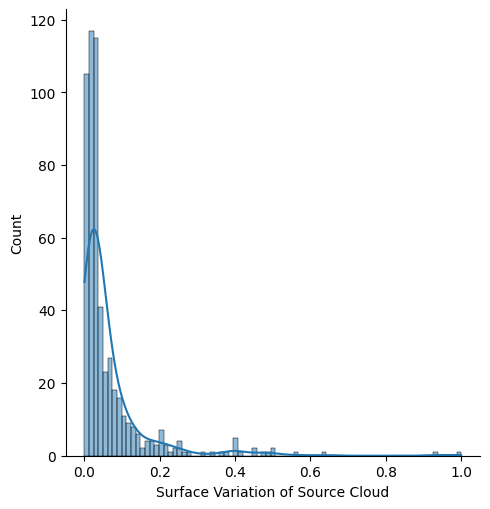

In [22]:
display_hist_from_seaborn(src_norm_surf_var, "Surface Variation of Source Cloud")

18


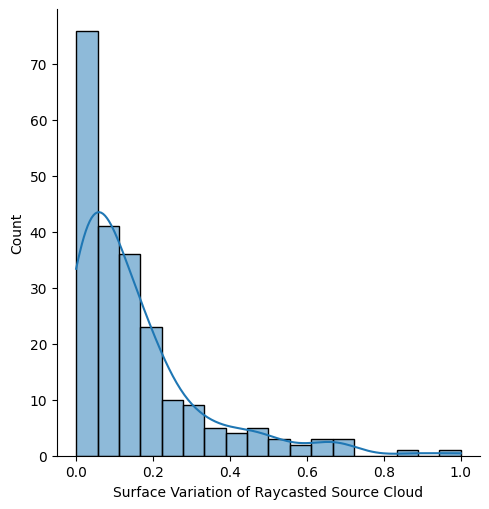

In [27]:
raycasted_source_pcd = o3d.io.read_point_cloud(raycasted_source_file)
raycasted_src_pcd_obj = PointCloudAnalysis(raycasted_source_pcd.points, search_tree=kdtreeseachknn)
raycasted_src_norm_surf_var = raycasted_src_pcd_obj.get_normalized_surface_variation()

display_hist_from_seaborn(raycasted_src_norm_surf_var, "Surface Variation of Raycasted Source Cloud")

In [25]:
len(source_pcd.points)

548

In [26]:
len(raycasted_source_pcd.points)

222

In [38]:
np.asarray(source_pcd.points).shape

(548, 3)

In [39]:
df_src_pcd_with_features = pd.DataFrame(index=range(np.asarray(source_pcd.points).shape[0]), columns=["X", "Y", "Z", "distance_from_origin", "surface_variation", "planarity", "linearity"])

In [40]:
df_src_pcd_with_features

,X,Y,Z,distance_from_origin,surface_variation,planarity,linearity
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
543,NaN,NaN,NaN,NaN,NaN,NaN,NaN
544,NaN,NaN,NaN,NaN,NaN,NaN,NaN
545,NaN,NaN,NaN,NaN,NaN,NaN,NaN
546,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df_src_pcd_with_features[["X", "Y", "Z"]] = source_pcd.points

In [42]:
df_src_pcd_with_features

,X,Y,Z,distance_from_origin,surface_variation,planarity,linearity
0,4.05199,4.03352,-0.523512,NaN,NaN,NaN,NaN
1,4.06547,3.99792,-0.522097,NaN,NaN,NaN,NaN
2,4.09164,3.97493,-0.522343,NaN,NaN,NaN,NaN
3,4.13305,3.96648,-0.524532,NaN,NaN,NaN,NaN
4,4.00406,4.03471,-0.563076,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
543,3.91012,3.89232,-2.40167,NaN,NaN,NaN,NaN
544,3.93375,3.86843,-2.40167,NaN,NaN,NaN,NaN
545,3.95727,3.84438,-2.40167,NaN,NaN,NaN,NaN
546,3.98062,3.8202,-2.40167,NaN,NaN,NaN,NaN


In [49]:
import math
def distance_from_origin_of_xyz(xyz):
    distn = math.sqrt((0 - xyz[0])**2 + (0 - xyz[1])**2 + (0 - xyz[2])**2)
    return distn

In [51]:
df_src_pcd_with_features["distance_from_origin"] = df_src_pcd_with_features.iloc[:, :3].apply(distance_from_origin_of_xyz, axis=1)

In [53]:
pcd_obj = PointCloudAnalysis(df_src_pcd_with_features.iloc[:, :3].to_numpy(), search_tree=kdtreeseachknn)
df_src_pcd_with_features["surface_variation"] = pcd_obj.get_normalized_surface_variation()
df_src_pcd_with_features["planarity"] = pcd_obj.get_normalized_planarity()
df_src_pcd_with_features["linearity"] = pcd_obj.get_normalized_linearity()


In [54]:
df_src_pcd_with_features

,X,Y,Z,distance_from_origin,surface_variation,planarity,linearity
0,4.05199,4.03352,-0.523512,5.741252,0.036649,0.224862,0.836277
1,4.06547,3.99792,-0.522097,5.725731,0.016148,0.601836,0.436008
2,4.09164,3.97493,-0.522343,5.728388,0.021327,0.786299,0.235789
3,4.13305,3.96648,-0.524532,5.752408,0.049708,0.269161,0.785041
4,4.00406,4.03471,-0.563076,5.712130,0.002013,0.196478,0.875352
...,...,...,...,...,...,...,...
543,3.91012,3.89232,-2.40167,6.017243,0.056636,0.470795,0.564789
544,3.93375,3.86843,-2.40167,6.017238,0.052420,0.538931,0.492316
545,3.95727,3.84438,-2.40167,6.017247,0.062526,0.536000,0.492283
546,3.98062,3.8202,-2.40167,6.017249,0.067426,0.465262,0.567498


In [59]:
df_raycasted_src_pcd_with_features = pd.DataFrame(index=range(np.asarray(raycasted_source_pcd.points).shape[0]), columns=["X", "Y", "Z", "distance_from_origin", "surface_variation", "planarity", "linearity"])
df_raycasted_src_pcd_with_features[["X", "Y", "Z"]] = raycasted_source_pcd.points
df_raycasted_src_pcd_with_features["distance_from_origin"] = df_raycasted_src_pcd_with_features.iloc[:, :3].apply(distance_from_origin_of_xyz, axis=1)
pcd_obj = PointCloudAnalysis(df_raycasted_src_pcd_with_features.iloc[:, :3].to_numpy(), search_tree=kdtreeseachknn)
df_raycasted_src_pcd_with_features["surface_variation"] = pcd_obj.get_normalized_surface_variation()
df_raycasted_src_pcd_with_features["planarity"] = pcd_obj.get_normalized_planarity()
df_raycasted_src_pcd_with_features["linearity"] = pcd_obj.get_normalized_linearity()

10


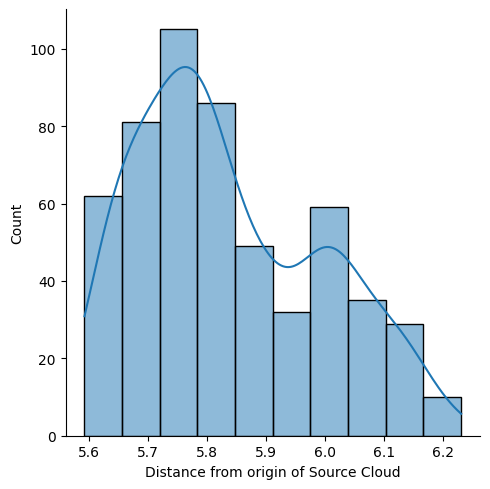

In [55]:
display_hist_from_seaborn(df_src_pcd_with_features["distance_from_origin"], "Distance from origin of Source Cloud")

7


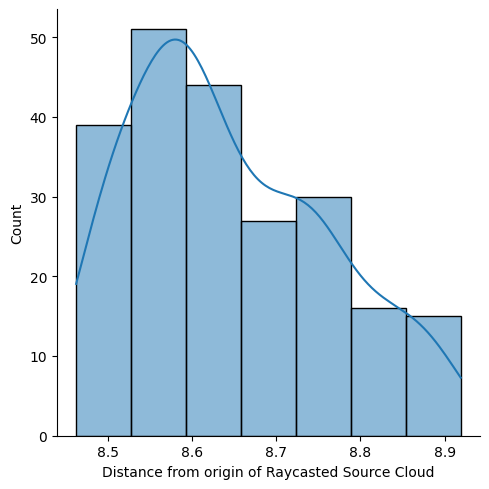

In [60]:
display_hist_from_seaborn(df_raycasted_src_pcd_with_features["distance_from_origin"], "Distance from origin of Raycasted Source Cloud")

10


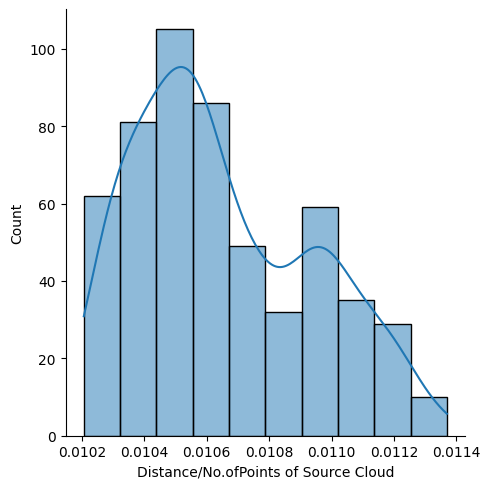

In [62]:
display_hist_from_seaborn(df_src_pcd_with_features["distance_from_origin"]/df_src_pcd_with_features.shape[0], "Distance/No.ofPoints of Source Cloud")

7


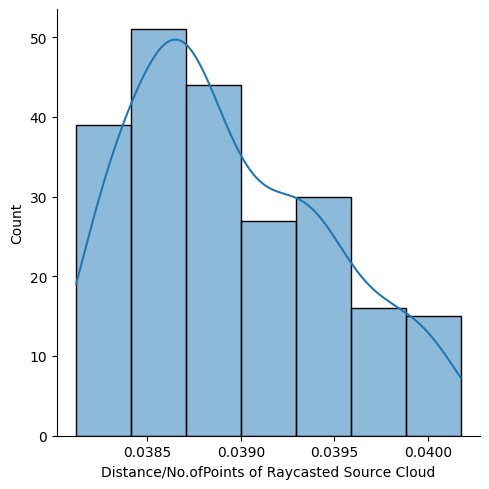

In [63]:
display_hist_from_seaborn(df_raycasted_src_pcd_with_features["distance_from_origin"]/df_raycasted_src_pcd_with_features.shape[0], "Distance/No.ofPoints of Raycasted Source Cloud")

#### avg.distance vs number of points graph

In [66]:
src_avg_distance = df_src_pcd_with_features["distance_from_origin"].sum(axis=0)/df_src_pcd_with_features.shape[0]

In [67]:
src_avg_distance

5.837694111328193

In [68]:
raycasted_src_avg_distance = df_raycasted_src_pcd_with_features["distance_from_origin"].sum(axis=0)/df_raycasted_src_pcd_with_features.shape[0]

In [69]:
raycasted_src_avg_distance

8.644852110376295

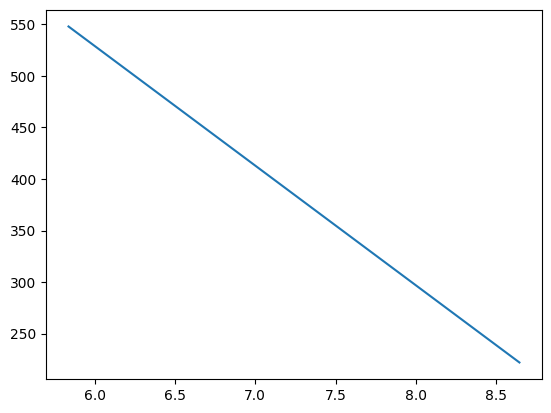

In [71]:
import matplotlib.pyplot as plt

x = [src_avg_distance, raycasted_src_avg_distance]
y = [df_src_pcd_with_features.shape[0], df_raycasted_src_pcd_with_features.shape[0]]

plt.plot(x,y)

## Lets plot the above graph but with more raycasted points

In [100]:
import math



files = ["../../interactive_pcd_lib/analyse_pcd_similarity/source_cloud.ply", "../../interactive_pcd_lib/analyse_pcd_similarity/raycasted_source_pcd_1.ply"
        , "../../interactive_pcd_lib/analyse_pcd_similarity/raycasted_source_pcd_2.ply", "../../interactive_pcd_lib/analyse_pcd_similarity/raycasted_source_pcd_3.ply"
        , "../../interactive_pcd_lib/analyse_pcd_similarity/raycasted_source_pcd_4.ply", "../../interactive_pcd_lib/analyse_pcd_similarity/raycasted_source_pcd_5.ply"
        , "../../interactive_pcd_lib/analyse_pcd_similarity/raycasted_source_pcd_6.ply", "../../interactive_pcd_lib/analyse_pcd_similarity/raycasted_source_pcd_7.ply"]



neigh_num = 5
kdtreeseachknn = o3d.geometry.KDTreeSearchParamKNN(neigh_num)

def distance_from_origin_of_xyz(xyz):
    distn = math.sqrt((0 - xyz[0])**2 + (0 - xyz[1])**2 + (0 - xyz[2])**2)
    return distn

hdf_file = "features_to_analyse.h5"



for file in files:
    pcd_file = o3d.io.read_point_cloud(file)
    df_file = pd.DataFrame(index=range(np.asarray(pcd_file.points).shape[0]), columns=["X", "Y", "Z", "distance_from_origin", "surface_variation", "planarity", "linearity"])
    df_file[["X", "Y", "Z"]] = pcd_file.points
    df_file["distance_from_origin"] = df_file.iloc[:, :3].apply(distance_from_origin_of_xyz, axis=1)
    pcd_obj = PointCloudAnalysis(df_file.iloc[:, :3].to_numpy(), search_tree=kdtreeseachknn)
    df_file["surface_variation"] = pcd_obj.get_normalized_surface_variation()
    df_file["planarity"] = pcd_obj.get_normalized_planarity()
    df_file["linearity"] = pcd_obj.get_normalized_linearity()
    key = "/features/"+file.split("/")[-1].split(".")[0]
    df_file.to_hdf(hdf_file, key=key, mode="a")
    
    
    # for each file we had to calculate the5distance and features, create df for each file
    

/home/nero/Projects/spawn_pedestrian_carla/env/lib/python3.8/site-packages/pandas/core/generic.py:2434: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->floating,key->block1_values] [items->Index(['X', 'Y', 'Z'], dtype='object')]

  pytables.to_hdf(


In [112]:
with pd.HDFStore(hdf_file) as store:
    # Get the keys in the HDF5 file
    keys = store.keys()
    
    # Print the keys and their hierarchy
for key in keys:
    print(key)

/features/raycasted_source_pcd_1
/features/raycasted_source_pcd_2
/features/raycasted_source_pcd_3
/features/raycasted_source_pcd_4
/features/raycasted_source_pcd_5
/features/raycasted_source_pcd_6
/features/raycasted_source_pcd_7
/features/source_cloud


In [127]:
# X =[]
# Y = []

distn_vs_points = {}

with pd.HDFStore(hdf_file) as store:
    keys = store.keys()
    for key in keys:
        df = store[key]
        avg_distn = df["distance_from_origin"].sum(axis=0)/df.shape[0]
        point_count = df.shape[0]
        distn_vs_points[point_count] = avg_distn

print(distn_vs_points)


{318: 7.911373941156701, 89: 15.671454188400968, 36: 23.54753341693519, 348: 7.297842975360348, 315: 7.401618212840032, 118: 12.071939259771806, 217: 8.41758985890417, 548: 5.837694111328193}


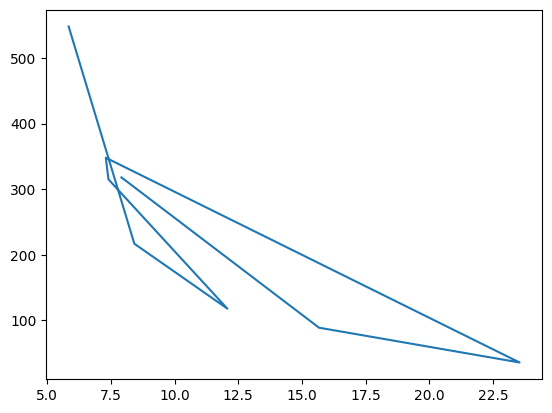

In [123]:
plt.plot(X,Y)

In [128]:
sorted(distn_vs_points)

[36, 89, 118, 217, 315, 318, 348, 548]

In [129]:
sorted_keys = sorted(distn_vs_points)
for key in sorted_keys:
    

In [131]:
sorted_xy = sorted(distn_vs_points.items())

In [134]:
X = [sorted_xy[i][0] for i in range(len(sorted_xy))]
Y = [sorted_xy[i][1] for i in range(len(sorted_xy))]

In [135]:
sorted_xy

[(36, 23.54753341693519),
 (89, 15.671454188400968),
 (118, 12.071939259771806),
 (217, 8.41758985890417),
 (315, 7.401618212840032),
 (318, 7.911373941156701),
 (348, 7.297842975360348),
 (548, 5.837694111328193)]

In [1]:
X = [36, 89, 118, 217, 315, 318, 348, 548]

In [2]:
Y = [23.54753341693519,
 15.671454188400968,
 12.071939259771806,
 8.41758985890417,
 7.401618212840032,
 7.911373941156701,
 7.297842975360348,
 5.837694111328193]

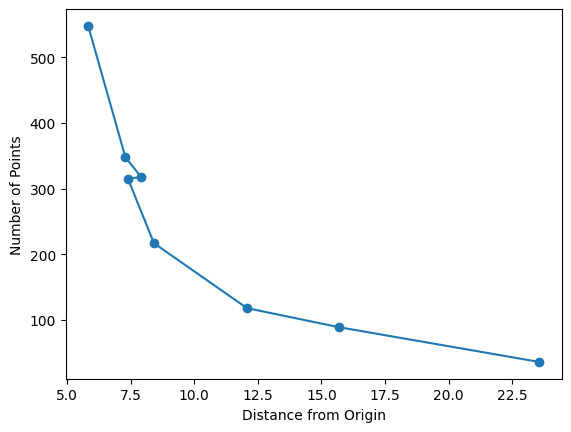

In [18]:
import matplotlib.pyplot as plt
plt.xlabel("Distance from Origin")
plt.ylabel("Number of Points")
plt.scatter(Y,X)
plt.plot(Y, X)

# Reading a new file for calculating the surf_var of raycasted pcd 8

In [9]:
import open3d as o3d
import pandas as pd
import numpy as np
import math
from surface_variation import PointCloudAnalysis

file = "../../interactive_pcd_lib/analyse_pcd_similarity/raycasted_source_pcd_8_original_position.ply"

neigh_num = 5
kdtreeseachknn = o3d.geometry.KDTreeSearchParamKNN(neigh_num)

def distance_from_origin_of_xyz(xyz):
    distn = math.sqrt((0 - xyz[0])**2 + (0 - xyz[1])**2 + (0 - xyz[2])**2)
    return distn


pcd_file = o3d.io.read_point_cloud(file)
df_raycasted_source = pd.DataFrame(index=range(np.asarray(pcd_file.points).shape[0]), columns=["X", "Y", "Z", "distance_from_origin", "surface_variation", "planarity", "linearity"])
df_raycasted_source[["X", "Y", "Z"]] = pcd_file.points
df_raycasted_source["distance_from_origin"] = df_raycasted_source.iloc[:, :3].apply(distance_from_origin_of_xyz, axis=1)
pcd_obj = PointCloudAnalysis(df_raycasted_source.iloc[:, :3].to_numpy(), search_tree=kdtreeseachknn)
df_raycasted_source["surface_variation"] = pcd_obj.get_normalized_surface_variation()
df_raycasted_source["planarity"] = pcd_obj.get_normalized_planarity()
df_raycasted_source["linearity"] = pcd_obj.get_normalized_linearity()

In [10]:
file = "../../interactive_pcd_lib/analyse_pcd_similarity/source_cloud.ply"

pcd_file = o3d.io.read_point_cloud(file)
df_source = pd.DataFrame(index=range(np.asarray(pcd_file.points).shape[0]), columns=["X", "Y", "Z", "distance_from_origin", "surface_variation", "planarity", "linearity"])
df_source[["X", "Y", "Z"]] = pcd_file.points
df_source["distance_from_origin"] = df_source.iloc[:, :3].apply(distance_from_origin_of_xyz, axis=1)
pcd_obj = PointCloudAnalysis(df_source.iloc[:, :3].to_numpy(), search_tree=kdtreeseachknn)
df_source["surface_variation"] = pcd_obj.get_normalized_surface_variation()
df_source["planarity"] = pcd_obj.get_normalized_planarity()
df_source["linearity"] = pcd_obj.get_normalized_linearity()

In [11]:
df_raycasted_source.shape

(516, 7)

In [12]:
df_source.shape

(548, 7)

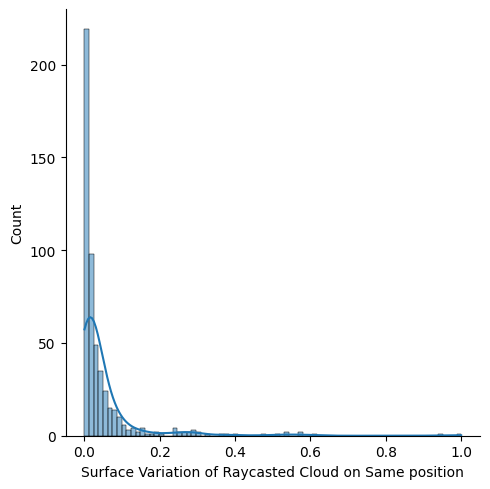

In [16]:
display_hist_from_seaborn(df_raycasted_source["surface_variation"], "Surface Variation of Raycasted Cloud on Same position", num_bins=81)

# Recalculating the graph for the new raycasted points

## Original Source cloud surface variation

Count of Number of Points :  81


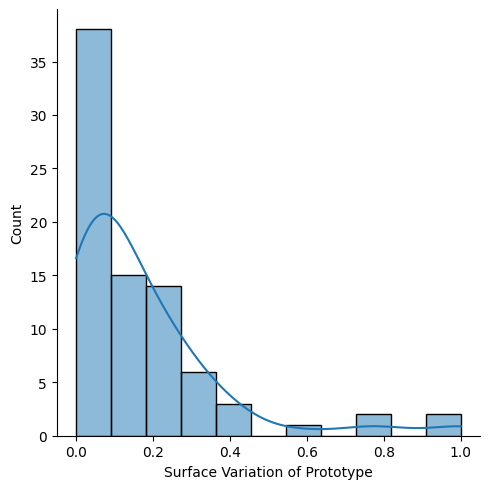

In [47]:
import open3d as o3d
import pandas as pd
import numpy as np
import math
import seaborn as sns
from surface_variation import PointCloudAnalysis

file = "../../interactive_pcd_lib/analyse_pcd_similarity2/source_cloud.ply"

neigh_num = 5
kdtreeseachknn = o3d.geometry.KDTreeSearchParamKNN(neigh_num)

def distance_from_origin_of_xyz(xyz):
    distn = math.sqrt((0 - xyz[0])**2 + (0 - xyz[1])**2 + (0 - xyz[2])**2)
    return distn

def get_bin_size_for_histogram(_data):
    """
    Bin calculated using Freedman-Diaconis rule for the histogram plot
    """
    iqr = np.percentile(_data, 75) - np.percentile(_data, 25)
    bin_width = 2 * iqr / np.power(len(_data), 1/3)
    num_bins = int((np.max(_data) - np.min(_data)) / bin_width)
    return num_bins


def display_hist_from_seaborn(feature_array, axis_name="No Name"):
    try:
        number_of_bins = get_bin_size_for_histogram(feature_array)
        # print(number_of_bins)
        axis = sns.displot(feature_array, bins=number_of_bins, kde=True)
    except Exception as e:
        print(f"Exception Occured,{e}, plot may not be consistent")
        axis = sns.displot(feature_array, bins=50,  kde=True,)
    axis.set_xlabels(axis_name)


pcd_file = o3d.io.read_point_cloud(file)
df = pd.DataFrame(index=range(np.asarray(pcd_file.points).shape[0]), columns=["X", "Y", "Z", "distance_from_origin", "surface_variation", "planarity", "linearity"])
df[["X", "Y", "Z"]] = pcd_file.points
df["distance_from_origin"] = df.iloc[:, :3].apply(distance_from_origin_of_xyz, axis=1)
pcd_obj = PointCloudAnalysis(df.iloc[:, :3].to_numpy(), search_tree=kdtreeseachknn)
df["surface_variation"] = pcd_obj.get_normalized_surface_variation()
df["planarity"] = pcd_obj.get_normalized_planarity()
df["linearity"] = pcd_obj.get_normalized_linearity()
print("Count of Number of Points : ", df.shape[0])
display_hist_from_seaborn(df["surface_variation"], "Surface Variation of Prototype")


## Raycasted source cloud on original location surface variation

Count of Number of Points :  88


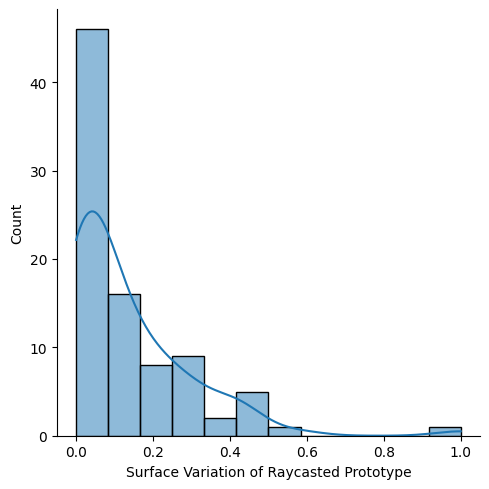

In [45]:
import open3d as o3d
import pandas as pd
import numpy as np
import math
import seaborn as sns
from surface_variation import PointCloudAnalysis

file = "../../interactive_pcd_lib/analyse_pcd_similarity2/raycasted_source_cloud_original_location.ply"

neigh_num = 5
kdtreeseachknn = o3d.geometry.KDTreeSearchParamKNN(neigh_num)

def distance_from_origin_of_xyz(xyz):
    distn = math.sqrt((0 - xyz[0])**2 + (0 - xyz[1])**2 + (0 - xyz[2])**2)
    return distn

def get_bin_size_for_histogram(_data):
    """
    Bin calculated using Freedman-Diaconis rule for the histogram plot
    """
    iqr = np.percentile(_data, 75) - np.percentile(_data, 25)
    bin_width = 2 * iqr / np.power(len(_data), 1/3)
    num_bins = int((np.max(_data) - np.min(_data)) / bin_width)
    return num_bins


def display_hist_from_seaborn(feature_array, axis_name="No Name"):
    try:
        number_of_bins = get_bin_size_for_histogram(feature_array)
        # print(number_of_bins)
        axis = sns.displot(feature_array, bins=number_of_bins, kde=True)
    except Exception as e:
        print(f"Exception Occured,{e}, plot may not be consistent")
        axis = sns.displot(feature_array, bins=50,  kde=True,)
    axis.set_xlabels(axis_name)


pcd_file = o3d.io.read_point_cloud(file)
df = pd.DataFrame(index=range(np.asarray(pcd_file.points).shape[0]), columns=["X", "Y", "Z", "distance_from_origin", "surface_variation", "planarity", "linearity"])
df[["X", "Y", "Z"]] = pcd_file.points
df["distance_from_origin"] = df.iloc[:, :3].apply(distance_from_origin_of_xyz, axis=1)
pcd_obj = PointCloudAnalysis(df.iloc[:, :3].to_numpy(), search_tree=kdtreeseachknn)
df["surface_variation"] = pcd_obj.get_normalized_surface_variation()
df["planarity"] = pcd_obj.get_normalized_planarity()
df["linearity"] = pcd_obj.get_normalized_linearity()

print("Count of Number of Points : ", df.shape[0])

display_hist_from_seaborn(df["surface_variation"], "Surface Variation of Raycasted Prototype")


## Plotting surface variation of actual person from semantic kitti dataset

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
Count of Number of Points :  610


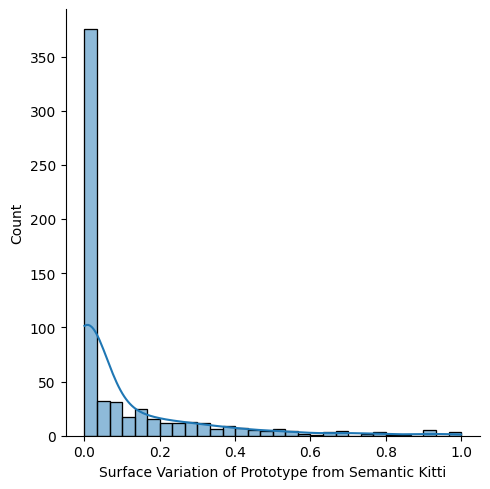

In [1]:
import open3d as o3d
import pandas as pd
import numpy as np
import math
import seaborn as sns
from surface_variation import PointCloudAnalysis

file = "../../interactive_pcd_lib/analyse_pcd_similarity2/source_cloud.ply"

neigh_num = 5
kdtreeseachknn = o3d.geometry.KDTreeSearchParamKNN(neigh_num)

def distance_from_origin_of_xyz(xyz):
    distn = math.sqrt((0 - xyz[0])**2 + (0 - xyz[1])**2 + (0 - xyz[2])**2)
    return distn

def get_bin_size_for_histogram(_data):
    """
    Bin calculated using Freedman-Diaconis rule for the histogram plot
    """
    iqr = np.percentile(_data, 75) - np.percentile(_data, 25)
    bin_width = 2 * iqr / np.power(len(_data), 1/3)
    num_bins = int((np.max(_data) - np.min(_data)) / bin_width)
    return num_bins


def display_hist_from_seaborn(feature_array, axis_name="No Name"):
    try:
        number_of_bins = get_bin_size_for_histogram(feature_array)
        # print(number_of_bins)
        axis = sns.displot(feature_array, bins=number_of_bins, kde=True)
    except Exception as e:
        print(f"Exception Occured,{e}, plot may not be consistent")
        axis = sns.displot(feature_array, bins=50,  kde=True,)
    axis.set_xlabels(axis_name)


pcd_file = o3d.io.read_point_cloud(file)
df = pd.DataFrame(index=range(np.asarray(pcd_file.points).shape[0]), columns=["X", "Y", "Z", "distance_from_origin", "surface_variation", "planarity", "linearity"])
df[["X", "Y", "Z"]] = pcd_file.points
df["distance_from_origin"] = df.iloc[:, :3].apply(distance_from_origin_of_xyz, axis=1)
pcd_obj = PointCloudAnalysis(df.iloc[:, :3].to_numpy(), search_tree=kdtreeseachknn)
df["surface_variation"] = pcd_obj.get_normalized_surface_variation()
df["planarity"] = pcd_obj.get_normalized_planarity()
df["linearity"] = pcd_obj.get_normalized_linearity()

print("Count of Number of Points : ", df.shape[0])

display_hist_from_seaborn(df["surface_variation"], "Surface Variation of Prototype from Semantic Kitti")


# Plotting Avg. Distance vs Number of Points Graph

In [15]:
import math
import os
import open3d as o3d
import pandas as pd
import numpy as np
from surface_variation import PointCloudAnalysis

folder = "../../interactive_pcd_lib/analyse_pcd_similarity2/"

files = os.listdir(folder)
print(files)

neigh_num = 5
kdtreeseachknn = o3d.geometry.KDTreeSearchParamKNN(neigh_num)

def distance_from_origin_of_xyz(xyz):
    distn = math.sqrt((0 - xyz[0])**2 + (0 - xyz[1])**2 + (0 - xyz[2])**2)
    return distn

hdf_file = "features_to_analyse.h5"



for file in files:
    print(file)
    pcd_file = o3d.io.read_point_cloud(folder+file)
    df_file = pd.DataFrame(index=range(np.asarray(pcd_file.points).shape[0]), columns=["X", "Y", "Z", "distance_from_origin", "surface_variation", "planarity", "linearity"])
    df_file[["X", "Y", "Z"]] = pcd_file.points
    df_file["distance_from_origin"] = df_file.iloc[:, :3].apply(distance_from_origin_of_xyz, axis=1)
    pcd_obj = PointCloudAnalysis(df_file.iloc[:, :3].to_numpy(), search_tree=kdtreeseachknn)
    df_file["surface_variation"] = pcd_obj.get_normalized_surface_variation()
    df_file["planarity"] = pcd_obj.get_normalized_planarity()
    df_file["linearity"] = pcd_obj.get_normalized_linearity()
    key = "/features/"+file.split("/")[-1].split(".")[0]
    df_file.to_hdf(hdf_file, key=key, mode="a")
    
    
    # for each file we had to calculate the5distance and features, create df for each file
    

['raycasted_source_cloud_far_5.ply', 'jan31_raycasted1.ply', 'source_cloud.ply', 'raycasted_source_cloud_near_9.ply', 'raycasted_source_cloud_near_origin_2.ply', 'source_cloud_old.ply', 'raycasted_source_cloud_near_origin_1.ply', 'raycasted_source_cloud_far_4.ply', 'raycasted_source_cloud_near_7.ply', 'raycasted_source_cloud_near_6.ply', 'raycasted_source_cloud_original_location.ply', 'raycasted_source_cloud_far_8.ply', 'raycasted_source_cloud_near_origin_3.ply']
raycasted_source_cloud_far_5.ply
jan31_raycasted1.ply
source_cloud.ply
raycasted_source_cloud_near_9.ply
raycasted_source_cloud_near_origin_2.ply
source_cloud_old.ply
raycasted_source_cloud_near_origin_1.ply
raycasted_source_cloud_far_4.ply
raycasted_source_cloud_near_7.ply
raycasted_source_cloud_near_6.ply
raycasted_source_cloud_original_location.ply
raycasted_source_cloud_far_8.ply
raycasted_source_cloud_near_origin_3.ply


### Creating a dict of number of pcd points as key and avg distance as value

In [16]:
hdf_file = "features_to_analyse.h5"

distn_vs_points = {}

with pd.HDFStore(hdf_file) as store:
    keys = store.keys()
    for key in keys:
        df = store[key]
        avg_distn = df["distance_from_origin"].sum(axis=0)/df.shape[0]
        point_count = df.shape[0]
        distn_vs_points[point_count] = avg_distn

print(distn_vs_points)

{323: 7.143329537113122, 14: 36.846586743201165, 34: 23.662418766914538, 46: 22.028639125175783, 214: 9.602071611015838, 278: 8.281985019385461, 260: 8.653804410401086, 424: 7.401222348681301, 304: 8.004067861999038, 528: 6.422965364337325, 88: 15.201807064657128, 271: 7.144172703097191, 873: 5.3120151790430965}


In [17]:
import collections

ordered_YX = collections.OrderedDict(sorted(distn_vs_points.items()))

In [18]:
y = ordered_YX.keys()

In [19]:
x = ordered_YX.values()

### plotting in graph

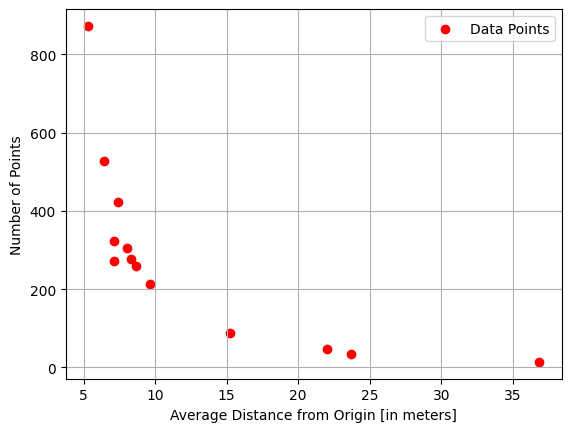

In [21]:
import matplotlib.pyplot as plt

plt.scatter(x, y, color='red', label='Data Points')

# Line plot
# plt.scatter(x, y, color='red')

# Labels and title
plt.xlabel('Average Distance from Origin [in meters]')
plt.ylabel('Number of Points')
# plt.title('Scatter Plot with Line')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()